# Exercise 5 

Group members: Anh Tu Duong Nguyen, Chaitanya Sampara, Max Tiedl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 5.3.1 Define function omp_regression(X, y, T)

The function takes in a (N, D) matrix X, a (N,) matrix y and a number T > 0 (number of desired nonzero elements in the final solution). This function should return a (D, T) matrix.

<div style="color: green; font-weight:bold">You basiclly implement the omp_regression function.But the formula you used to calculate the beta is not correct.You miss the X_t and the transpose of X_t.In addition, if you want to improve the speed, you can use numpy.argmax function instead of a loop function.</div>

In [2]:
def omp_regression(X, y, T):
    a = []
    b = list(range(X.shape[1]))
    r = np.copy(y)
    X_t = np.zeros(X.shape)
    betas = []
    for i in range(T):
        
        j_t = -1
        max_v = -1
        for j in b:
            v = np.abs(np.dot(X.T[j], r))
            if v > max_v:
                max_v = v
                j_t = j
                
        a.append(j_t)
        b.remove(j_t)
        X_t[:, j_t] = X[:, j_t]
        beta = np.dot(np.linalg.pinv(X_t), y)
        betas.append(beta)
        r = y - np.dot(X_t, beta)
    return np.array(betas)

# 5.3.2 Compute test error for sparse LDA classification

<div style="color: green; font-weight:bold">You implement the error rate function and visulize the curve of error rate as in sample! But you forgot to answer the question"how many pixels should be used" and visualize the image of digits.You can visualize that via heatmap.</div>

Using the **digits** dataset from ex. 1, we should compute the test error for our implemented algorithm

In [3]:
digits = load_digits()

In [4]:
data = digits [ "data" ]
images = digits [ "images" ]
target = digits [ "target" ]
target_names = digits [ "target_names"]

This part was taken from the sample solution of exercise sheet 1

In [5]:
# Data filering
num_1, num_2 = 3, 9
mask = np.logical_or(target == num_1, target == num_2)
data = data[mask]/data.max()
target = target[mask]
# Relabel targets
target[target == num_1] = -1
target[target == num_2] = 1
# split into train and test data
X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(
X_all, y_all, test_size=0.4 , random_state=0)

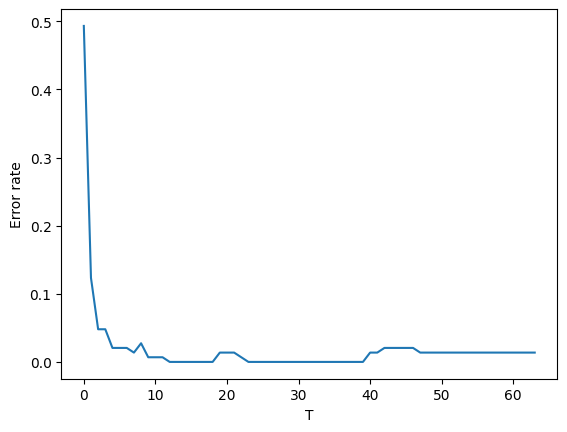

In [6]:
solution = omp_regression(X_train, y_train, 64)
error_rates = np.zeros(len(solution))
for i, beta in enumerate(solution):
    y_pred = np.dot(X_test, beta) 
    y_pred[y_pred >= 0] = 1
    y_pred[y_pred < 0] = -1
    
    errors = np.sum(y_pred != y_test)
    error_rate = errors / len(y_test)
    
    error_rates[i] = error_rate

plt.plot(error_rates)
plt.xlabel("T")
plt.ylabel("Error rate")
plt.show()